In [1]:
## 필요한 라이브러리 준비!

In [2]:
import os
import urllib    ## 웹에서 데이터를 다운로드 할 때 사용
import cv2       ## OpenCV 라이브러리로 이미지를 처리할 때 사용
import numpy as np
from pixellib.semantic import semantic_segmentation
## pixellib는 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

print("슝 =3")

슝 =3


(1071, 1080, 3)


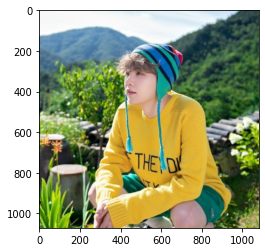

In [3]:
## 본인이 선택한 이미지의 경로에 맞게 바꿔준다.
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/hi.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
## 먼저 PixelLib 에서 제공해 주는 모델을 다운로드한다.
## 저장할 파일 이름을 결정한다.
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

## PixelLib가 제공하는 모델의 url이다.
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

## 다운로드를 시작한다.
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f70d42a95b0>)

In [5]:
## 다운로드한 모델을 이용해 PicelLib 로 우리가 사용할
## 세그멘테이션 모델을 생성한다.
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [6]:
## 모델에 이미지를 입력해보자.
segvalues, output = model.segmentAsPascalvoc(img_path)

In [7]:
## PASCAL VOC 데이터의 라벨 종류는 밑에 코드랑 동일
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

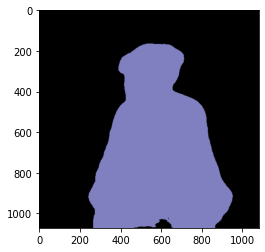

In [8]:
## 위에 라벨 중에서 사람라벨 15 를 가진 영역만 검출해 내고 싶다. 
## 일단 모델에서 나온 출력값을 출력
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [11]:
## 아래 코드를 이해하지 않아도 좋다고 하네여.....
## PixelLib에서 그대로 가져온 코드이다.
## 주목해야 할 것은 생상 코드 결과물이다!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
## PixelLib 에 따르면 위에 저런 결과와 같은 색상을 사용함
## 사람을 나타내는 15번째 색상은?

colormap[15]

array([192, 128, 128])

In [13]:
## 우리가 추출해야 하는 색상 값은 순서를 바꿔줘야함

seg_color = (128,128,192)

(1071, 1080)


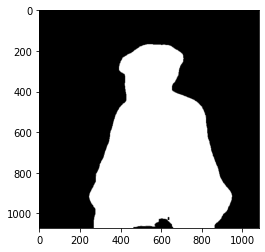

In [14]:
## seg_color 로만 이루어진 마스크를 만들어보자~

## output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 된다.
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

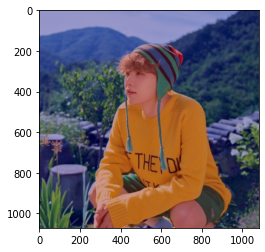

In [15]:
img_show = img_orig.copy()

## True과 False인 값을 각각 255과 0으로 바꿔준다.
img_mask = seg_map.astype(np.uint8) * 255

## 255와 0을 적당한 색상으로 바꿔본다.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

## 원본 이미지와 마스트를 적당히 합쳐본다.
## 0.6과 0.4는 두 이미지를 섞는 비율이다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
## 배경을 흐리게 하기

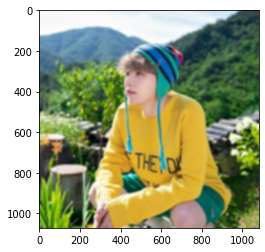

In [17]:
## 배경을 흐리게 하기 위해서는 blur() 함수를 이용한다.

## (13,13)은 blurring kernel size를 뜻한다.
## 다양하게 바꿔보자!
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

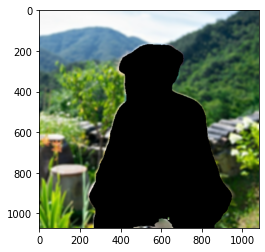

In [18]:
## 흐려진 이미지에다가 세그멘테이션 마스크를 이용해서 배경만 추출하기

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

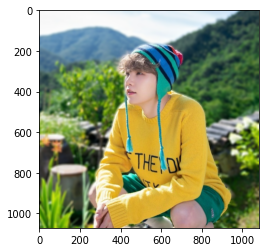

In [19]:
## 배경이랑 사람 영상을 합성!!
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()